# Parag Sharma

## DSBA

## Task 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the data Set

In [2]:
df= pd.read_csv("C:/Users/ParagSharma.000/Desktop/Iris.csv")

### Dropping unnecessary column and checking for missing values

In [3]:
df.drop(['Id'], axis = 1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# We do not have any NA values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# data is equally distributed
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Visualizing The Features

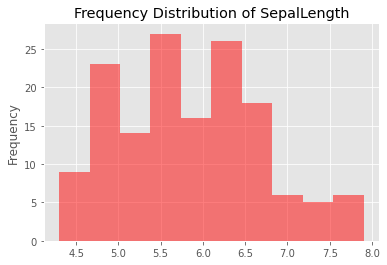

In [6]:
plt.style.use('ggplot')
df.SepalLengthCm.plot(kind='hist',x='SepalLengthCm',color='red',alpha=0.5,title='Frequency Distribution of SepalLength')

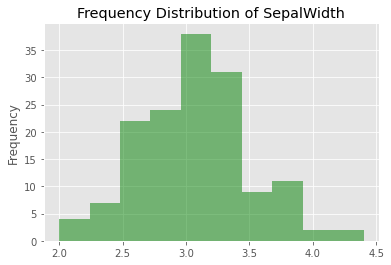

In [7]:
df.SepalWidthCm.plot(kind='hist',x='SepalWidthCm',color='green',alpha=0.5,title='Frequency Distribution of SepalWidth')

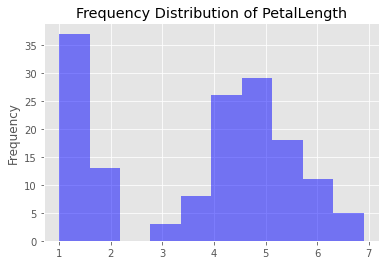

In [8]:
df.PetalLengthCm.plot(kind='hist',x='PetalLengthCm',color='blue',alpha=0.5,title='Frequency Distribution of PetalLength')

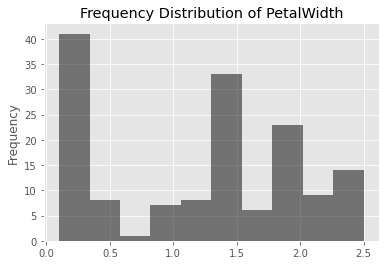

In [9]:
df.PetalWidthCm.plot(kind='hist',x='PetalWidthCm',color='black',alpha=0.5,title='Frequency Distribution of PetalWidth')

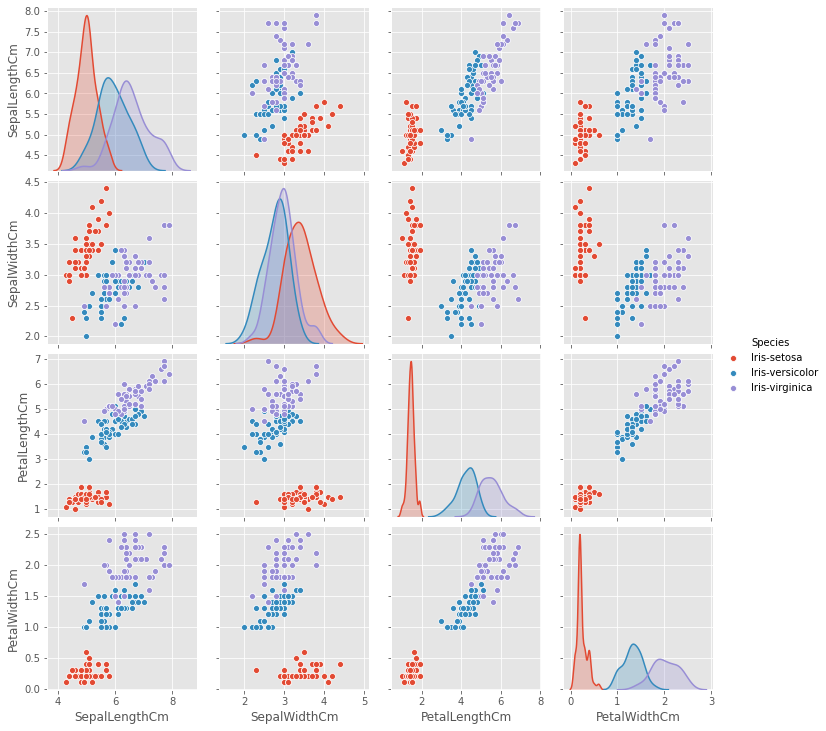

In [10]:
import seaborn as sns
sns.pairplot(df,hue='Species')

### Creating Test Train data and Decision Tree

In [11]:
# Defining the decision tree algorithm
X=df.loc[:, df.columns != 'Species']
Y=df.Species
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth = 8)
dtree.fit(x_train,y_train)
predtree=dtree.predict(x_test)
print('Decision Tree Classifer Created, Predicted Data Set Created')

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)
Decision Tree Classifer Created, Predicted Data Set Created


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy score for Decision Tree',':',accuracy_score(y_test,predtree))

Accuracy score for Decision Tree : 0.9777777777777777


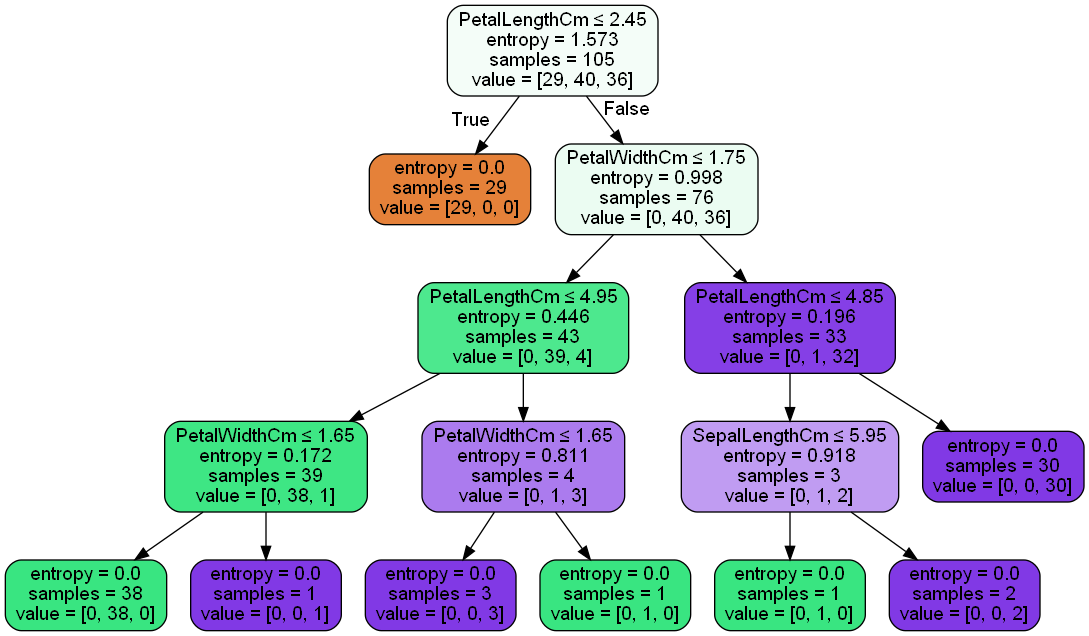

In [13]:
# Import necessary libraries for graph viz
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Predicting Via Created Model

In [14]:
data1=[[3.4,5.6,2.1,3.1]]
data2=[[1.2,5.1,4.2,1.1]]

In [15]:
dtree.predict(data1)

array(['Iris-setosa'], dtype=object)

In [16]:
dtree.predict(data2)

array(['Iris-versicolor'], dtype=object)